<a href="https://colab.research.google.com/github/vineelabaisa9119/emissions/blob/main/emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [5]:
#step 1
df=pd.read_csv("/content/EmissionsData.csv")

In [7]:
df.head(5) #prints few rows

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0


In [8]:
df.shape

(14, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


In [10]:
#step 2
#Vishualize
import matplotlib.pyplot as plt

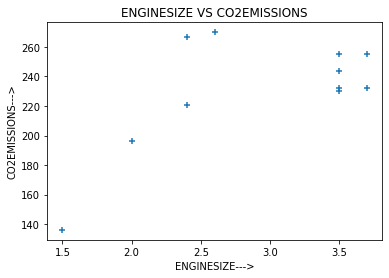

In [11]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,marker='+')
plt.xlabel("ENGINESIZE--->")
plt.ylabel("CO2EMISSIONS--->")
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.show()

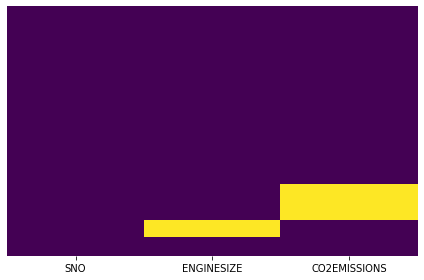

In [12]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [13]:
#to replace nan values
import math
median_ENGINESIZE = math.floor(df.ENGINESIZE.median())
median_ENGINESIZE

3

In [14]:
df.ENGINESIZE=df.ENGINESIZE.fillna(median_ENGINESIZE)

In [15]:
mean_CO2EMISSIONS=math.floor(df.CO2EMISSIONS.mean())
mean_CO2EMISSIONS

233

In [16]:
df.CO2EMISSIONS=df.CO2EMISSIONS.fillna(mean_CO2EMISSIONS)

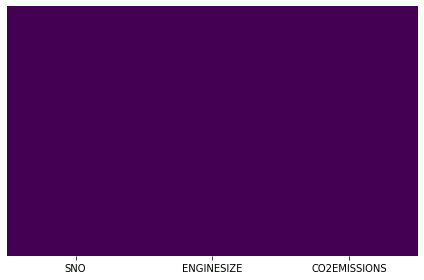

In [17]:
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')
  plt.tight_layout()
  return plt.show()

get_heatmap(df)

In [18]:
#step 3 preparing thr data
X=df.iloc[0:,-2:-1].values
Y=df.iloc[:,-1:].values

In [21]:
X

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [2.5],
       [3. ],
       [2.6]])

In [22]:
Y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [233.],
       [233.],
       [269.],
       [270.]])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
X_train

array([[2.5],
       [1.5],
       [2.6],
       [2.4],
       [2.4],
       [3.7],
       [3.5],
       [3.5],
       [2. ],
       [3.5],
       [3. ]])

In [25]:
X_test

array([[3.7],
       [3.5],
       [3.5]])

In [26]:
Y_train

array([[233.],
       [136.],
       [270.],
       [267.],
       [221.],
       [232.],
       [233.],
       [255.],
       [196.],
       [230.],
       [269.]])

In [27]:
Y_test

array([[255.],
       [232.],
       [244.]])

In [28]:
#TRAINING MODELL
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [29]:
model.fit(X_train,Y_train)

LinearRegression()

In [30]:
#Predict
y_pred=model.predict(X_test)
y_pred

array([[259.68622904],
       [253.45754549],
       [253.45754549]])

In [31]:
Y_test

array([[255.],
       [232.],
       [244.]])

In [32]:
print("Predicted value for training data:",model.score(X_train,Y_train))
print("Training accuracy:",model.score(X_train,Y_train)*100)

Predicted value for training data: 0.325265263742891
Training accuracy: 32.5265263742891


In [33]:
print("Predicted value for testing data:",model.score(X_test,Y_test))
print("Testing accuracy:",model.score(X_test,Y_test)*100)

Predicted value for testing data: -1.1605749404872192
Testing accuracy: -116.05749404872192


In [34]:
accuracy=model.score(X,Y)*100
print(accuracy)

31.631486410905186


In [35]:
model.coef_

array([[31.14341777]])

In [36]:
model.intercept_

array([144.4555833])

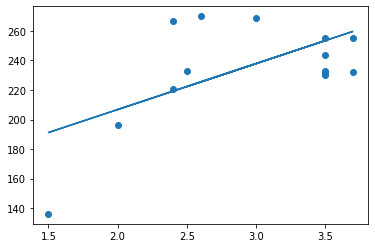

In [37]:
#VISUALIZING RESULTSS
#plotting the linear reg
line=model.coef_*X+model.intercept_
#y=mx+c
#plotting
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

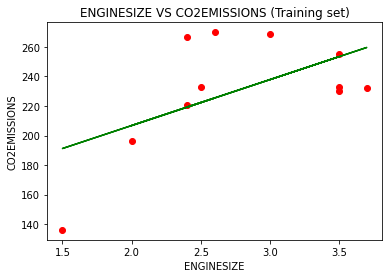

In [38]:
#trainset results
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='green')
plt.title('ENGINESIZE VS CO2EMISSIONS (Training set)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

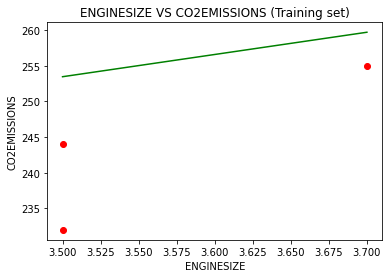

In [39]:
#trainset results
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='green')
plt.title('ENGINESIZE VS CO2EMISSIONS (Training set)')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()